# Домашнее задание №11
*Задание выполнил* **Чащин Артем Максимович**

*Курс:* **3**, *группа:* **МФТИ-1**

**[GitHub](https://github.com/alexvilno/PSU_TIMESERIES/tree/HW2)**

**[Telegram](https://t.me/artemchashchin)**

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import seaborn
import pandas as pd

In [92]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')

True

Sampling Rate: 44100
Audio Shape: (3460684, 2)
длительность 78.47356009070295 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 7.84734921e+01
 7.84735147e+01 7.84735374e+01] 
 размерность времени 3460684


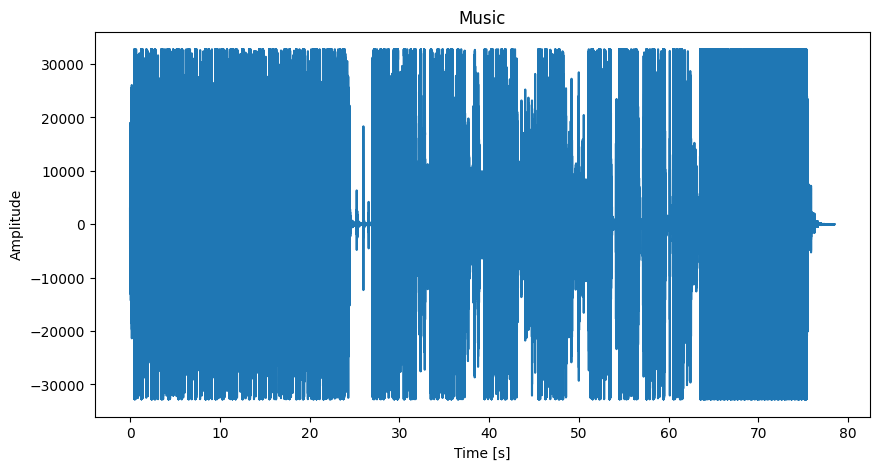

In [93]:
import os
from typing import Tuple, List
import numpy as np
from scipy.io import wavfile

def read_wav_file(filepath: str) -> Tuple[int, np.ndarray]:
    samplerate, data = wavfile.read(filepath)
    return samplerate, data

def get_audio_info(filepath: str) -> Tuple[int, np.ndarray, float, np.ndarray]:
    samplerate, data = read_wav_file(filepath)
    duration = len(data) / samplerate
    time = np.arange(0, duration, 1 / samplerate)
    time = time[:len(time)]
    canal1 = data[:, 0]
    canal2 = data[:, 1]
    return samplerate, data, duration, time

def process_wav_file() -> None:
    wav_filepath = os.getenv('KLIP_ZA_10_LYAMOV_WAV_SRC')
    try:
        samplerate, data, duration, time = get_audio_info(wav_filepath)
        print('Sampling Rate:', samplerate)
        print('Audio Shape:', np.shape(data))
        print(f"длительность {duration} \n временная шкала {time} \n размерность времени {len(time)}")
        plt.figure(figsize=(10, 5))
        plt.plot(time, data[:, 0])
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.title('Music')
        plt.show()
    except Exception as e:
        print(f"Ошибка при обработке файла: {e}")

process_wav_file()

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

def plot_fft(canal1: np.ndarray, samplerate: int, duration: float) -> None:
    """
    Строит график спектра частот с использованием быстрого преобразования Фурье (FFT) входных данных.

    Аргументы:
        canal1 (np.ndarray): Входные данные для канала 1.
        samplerate (int): Частота дискретизации данных.
        duration (float): Длительность данных.

    Возвращает:
        None
    """
    try:
        # число точек в normalized_tone
        N = int(samplerate * duration)

        yf = rfft(canal1)
        xf = rfftfreq(N, 1 / samplerate)

        plt.plot(xf, np.abs(yf))
        plt.xlabel('Частота')
        plt.ylabel('Мощность')
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")

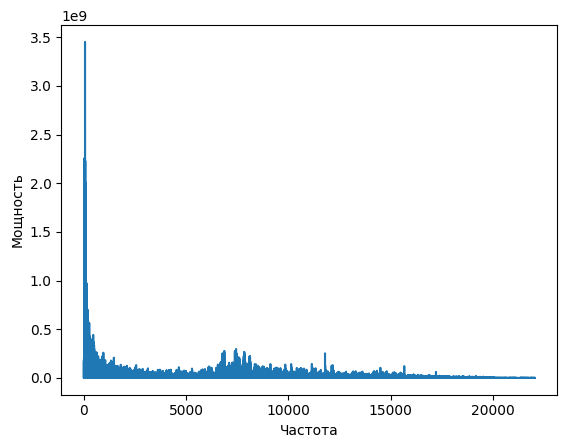

In [95]:
samplerate, data, duration, time = get_audio_info(os.getenv('KLIP_ZA_10_LYAMOV_WAV_SRC'))
plot_fft(data[:,0], samplerate, duration)

In [96]:
N = int(samplerate * duration)
yf = rfft(data[:,0])
xf = rfftfreq(N, 1 / samplerate)

points_per_freq = len(xf) / (max(xf))

target_idx_hf = int(points_per_freq * 900)
target_idx_lf = int(points_per_freq * 300)

yf_hf = yf.copy()
yf_lf = yf.copy()
yf_bp = yf.copy()
yf_zf = yf.copy()

yf_hf[:target_idx_hf] = 0

yf_lf[target_idx_lf:] = 0

yf_bp[:target_idx_lf] = 0
yf_bp[target_idx_hf:] = 0

yf_zf[target_idx_lf:target_idx_hf] = 0

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

def plot_fft_subplot(canal1: np.ndarray, yf_hf: np.ndarray, yf_lf: np.ndarray, yf_bp: np.ndarray, yf_zf: np.ndarray, samplerate: int, duration: float) -> None:
    """
    Строит графики спектра частот с использованием быстрого преобразования Фурье (FFT) для различных фильтров.

    Аргументы:
        canal1 (np.ndarray): Входные данные для оригинального сигнала.
        yf_hf (np.ndarray): Результат FFT для фильтра высоких частот.
        yf_lf (np.ndarray): Результат FFT для фильтра низких частот.
        yf_bp (np.ndarray): Результат FFT для полосового фильтра.
        yf_zf (np.ndarray): Результат FFT для полосо-заграждающего фильтра.
        samplerate (int): Частота дискретизации данных.
        duration (float): Длительность данных.

    Возвращает:
        None
    """
    try:
        xf = rfftfreq(len(canal1), 1 / samplerate)

        fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

        ax[0, 0].plot(xf, np.abs(rfft(canal1)))
        ax[0, 0].set_title("Оригинал")

        ax[0, 1].plot(xf, np.abs(yf_hf))
        ax[0, 1].set_title("Фильтр ВЧ")

        ax[1, 0].plot(xf, np.abs(yf_lf))
        ax[1, 0].set_title("Фильтр НЧ")

        ax[1, 1].plot(xf, np.abs(yf_bp))
        ax[1, 1].set_title("Фильтр BP")

        ax[2, 0].plot(xf, np.abs(yf_zf))
        ax[2, 0].set_title("Полосо-заградительный фильтр")

        plt.xlabel('Частота')
        plt.ylabel('Амплитуда')

        plt.show()

    except Exception as err:
        raise err

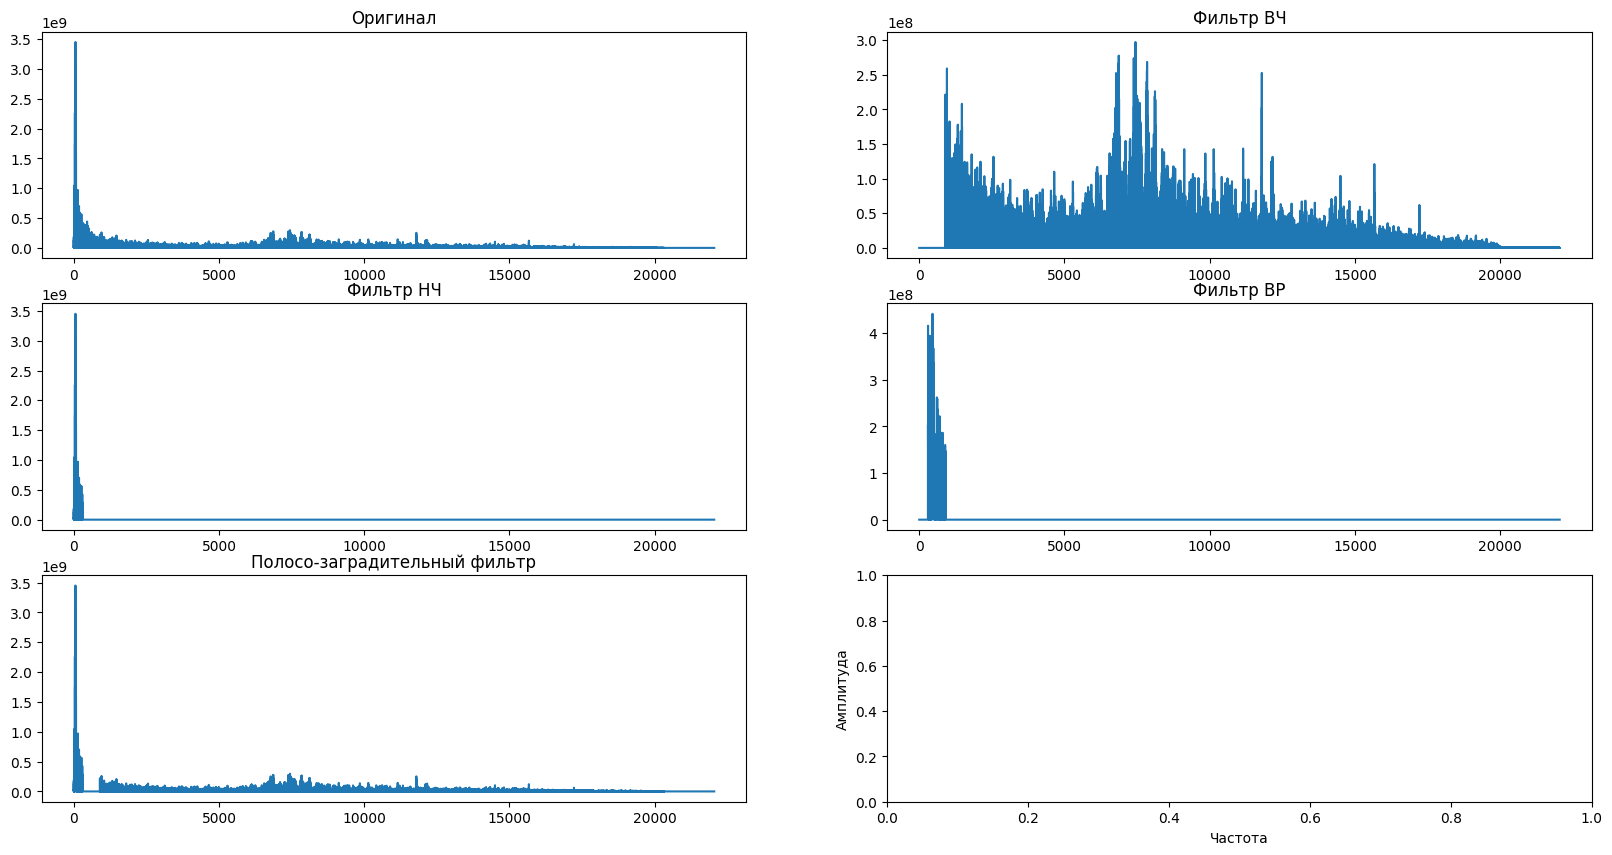

In [98]:
plot_fft_subplot(
    canal1=data[:,0], 
    yf_hf=yf_hf, 
    yf_lf=yf_lf, 
    yf_bp=yf_bp,
    yf_zf=yf_zf,
    samplerate=samplerate,
    duration=duration
)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft

def plot_filtered_signals(canal1: np.ndarray, yf_hf: np.ndarray, yf_lf: np.ndarray, yf_bp: np.ndarray, yf_zf: np.ndarray, samplerate: int, duration: float) -> None:
    """
    Строит графики отфильтрованных сигналов во временной области.

    Аргументы:
        canal1 (np.ndarray): Входные данные для оригинального сигнала.
        yf_hf (np.ndarray): Результат FFT для фильтра высоких частот.
        yf_lf (np.ndarray): Результат FFT для фильтра низких частот.
        yf_bp (np.ndarray): Результат FFT для полосового фильтра.
        yf_zf (np.ndarray): Результат FFT для полосо-заграждающего фильтра.
        samplerate (int): Частота дискретизации данных.
        duration (float): Длительность данных.

    Возвращает:
        None
    """
    try:

        fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

        ax[0, 0].plot(canal1)
        ax[0, 0].set_title("Оригинал")

        ax[0, 1].plot(irfft(yf_hf)[:len(yf_hf / 2)])
        ax[0, 1].set_title("Фильтр ВЧ")

        ax[1, 0].plot(irfft(yf_lf)[:len(yf_lf / 2)])
        ax[1, 0].set_title("Фильтр НЧ")

        ax[1, 1].plot(irfft(yf_bp)[:len(yf_bp / 2)])
        ax[1, 1].set_title("Фильтр BP")

        ax[2, 0].plot(irfft(yf_zf)[:len(yf_zf / 2)])
        ax[2, 0].set_title("Полосо-заградительный фильтр")

        plt.xlabel('Время [c]')
        plt.ylabel('Мощность')

        plt.show()

    except Exception as e:
        print(f"Произошла ошибка: {str(e)}")

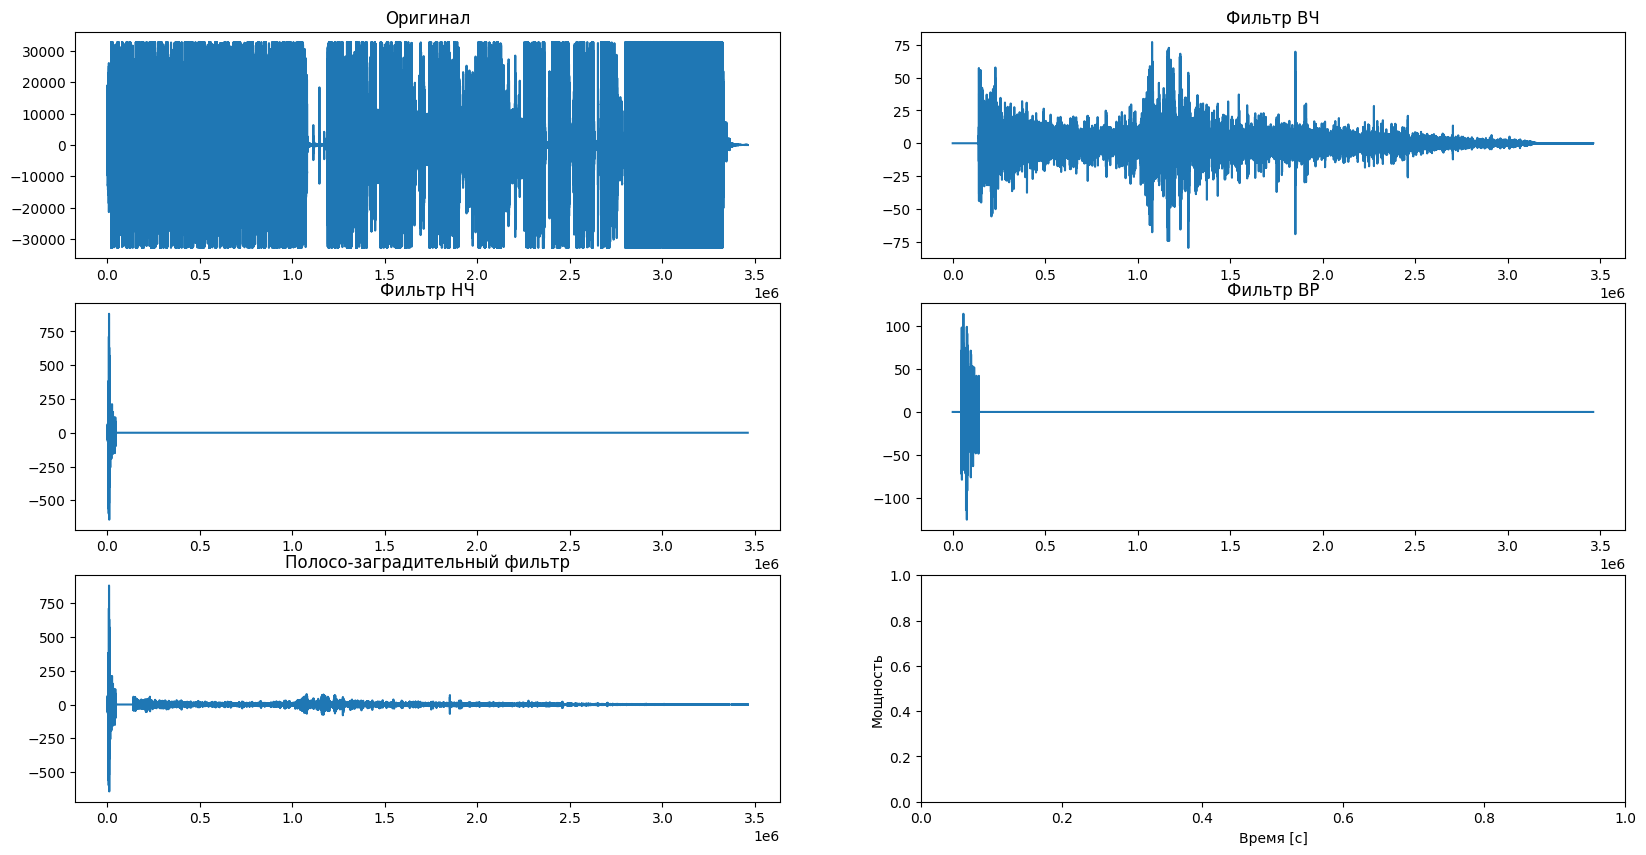

In [100]:
new_sig_hf = irfft(yf_hf)
new_sig_lf = irfft(yf_lf)
new_sig_bp = irfft(yf_bp)
new_sig_zf = irfft(yf_zf)

plot_filtered_signals(
    canal1=data[:,0],
    yf_hf=new_sig_hf,
    yf_lf=new_sig_lf,
    yf_bp=new_sig_bp,
    yf_zf=new_sig_zf,
    samplerate=samplerate,
    duration=duration
)

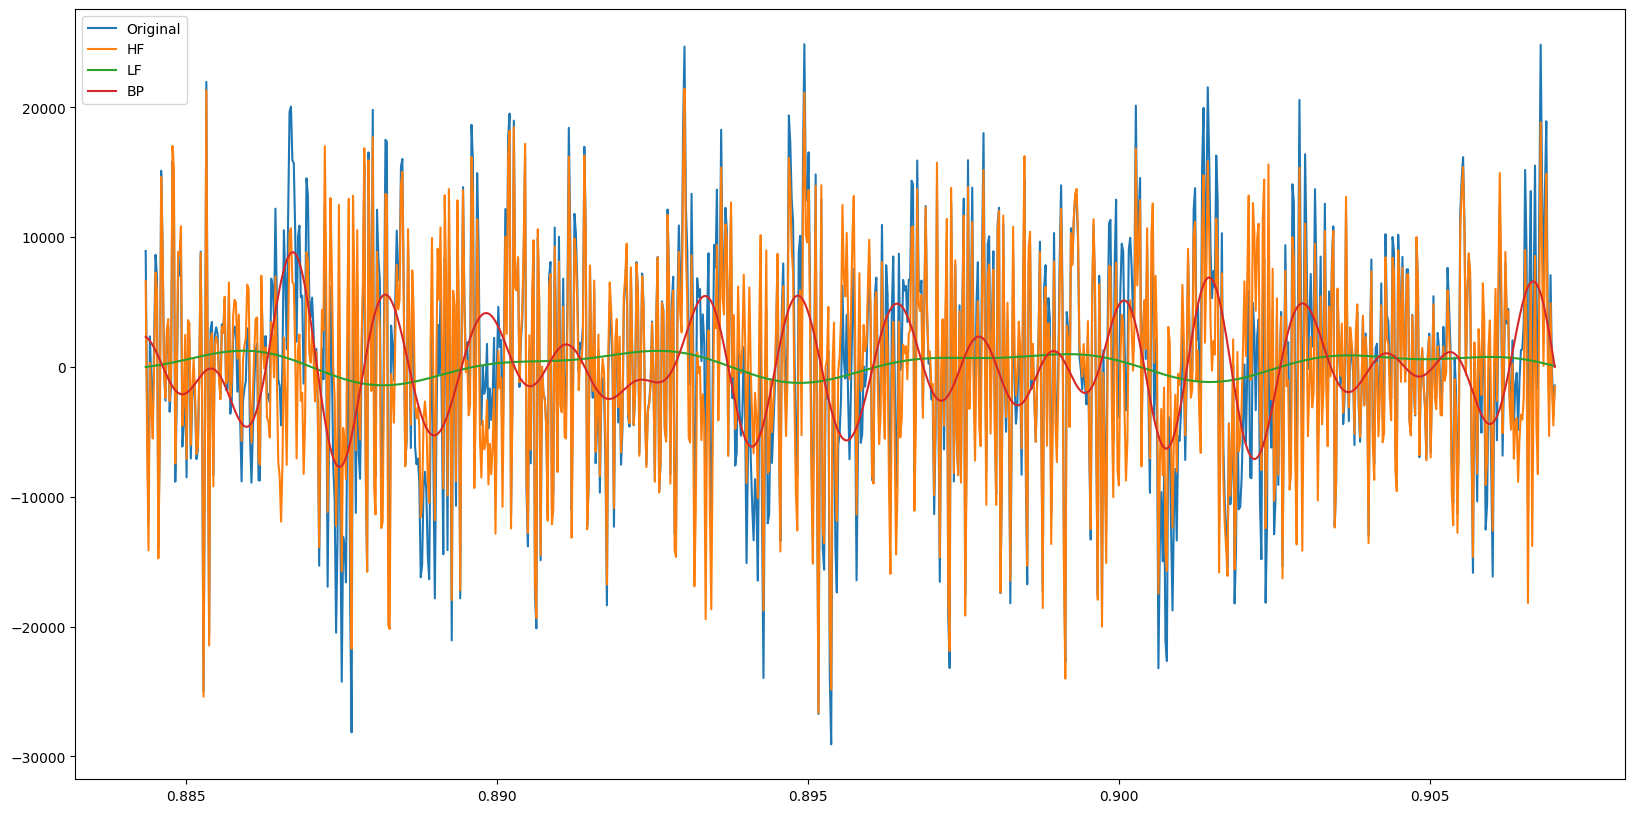

In [101]:
fig, ax = plt.subplots( figsize=(20, 10) )


original , = ax.plot(time[39000:40000], data[:,0][39000:40000], label='Original')
signal_hf , = ax.plot(time[39000:40000], new_sig_hf[39000:40000], label='HF')
signal_lf , = ax.plot(time[39000:40000], new_sig_lf[39000:40000], label='LF')
signal_bp , = ax.plot(time[39000:40000], new_sig_bp[39000:40000], label='BP')


ax.legend(handles=[original, signal_hf, signal_lf, signal_bp])
                                    
plt.show()

In [102]:
import time as OSTime

# слушаем, что получилось
sd.play(new_sig_lf, samplerate)
OSTime.sleep(5)
sd.stop()

## ПОЛУЧИЛОСЬ ОЧЕНЬ КРУТО

In [121]:
def exponential_smoothing(values, alpha):
    result = [values[0], values[1]]    
    for n in range(1, len(values)):
        result.append(alpha * result[n] + (1 - alpha) * values[n-1])    
    return result



In [104]:
def double_exponential_smoothing(values, alpha, beta):
    result = [values[0]]
    for n in range(1, len(values)+1):
        if n == 1:
            level, trend = values[0], values[1] - values[0]
        if n >= len(values):
            value = values[-1]
        else:
            value = values[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result


In [105]:
def plot_exponential_smoothing(series, alphas):
    with plt.style.context("_classic_test_patch"):  
        plt.figure(figsize=(15, 7))

        plt.plot(series[1], "c", label="Actual")

        for alpha in alphas:
            plt.plot(exponential_smoothing(series[1], alpha), label="Alpha {}".format(alpha))

        plt.legend(loc="best")
        plt.axis("tight")
        plt.title("Exponential Smoothing")
        plt.grid(True)

In [106]:
def plot_double_exponential_smoothing(signal_part, alphas, betas):    
    with plt.style.context('seaborn-v0_8-white'):
        plt.figure(figsize=(20, 8))
        for alpha in alphas:
            for beta in betas:
                plt.plot(double_exponential_smoothing(signal_part, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(signal_part, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

In [116]:
canal1 = data[:,0]

signal_part = canal1[39000:40000]
time_part = time[39000:40000]
 
series = pd.Series([time[39000:40000], canal1[39000:40000]])

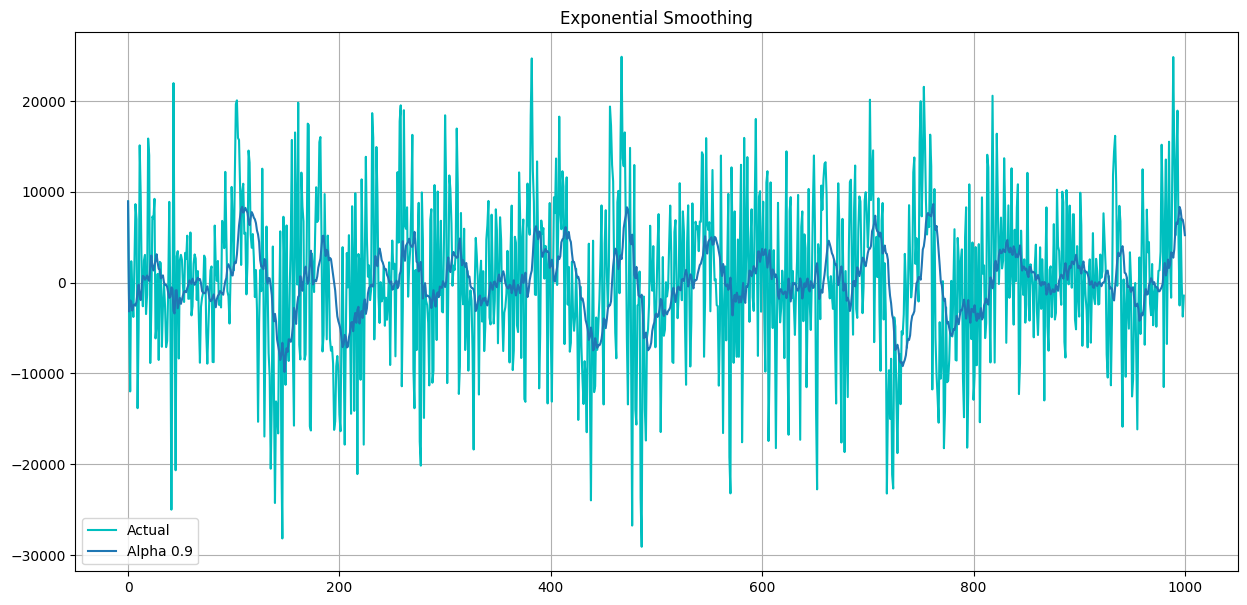

In [122]:
plot_exponential_smoothing(series, alphas=[0.9])

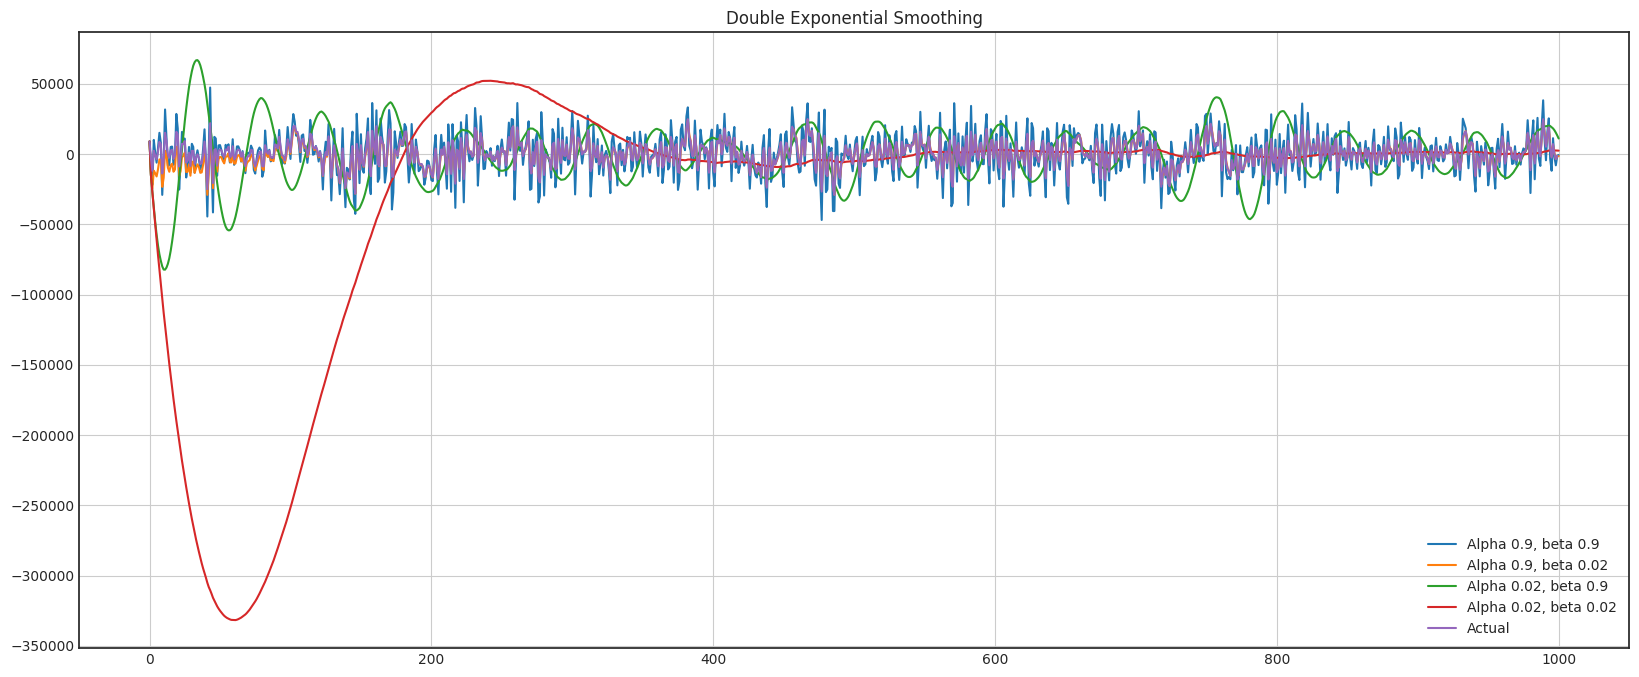

In [109]:
plot_double_exponential_smoothing(signal_part, alphas=[0.9, 0.02], betas=[0.9, 0.02])

In [110]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)

    for j in range(n_seasons):
        season_averages.append(sum(series[slen * j:slen * j + slen]) / float(slen))

    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0:
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series):
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

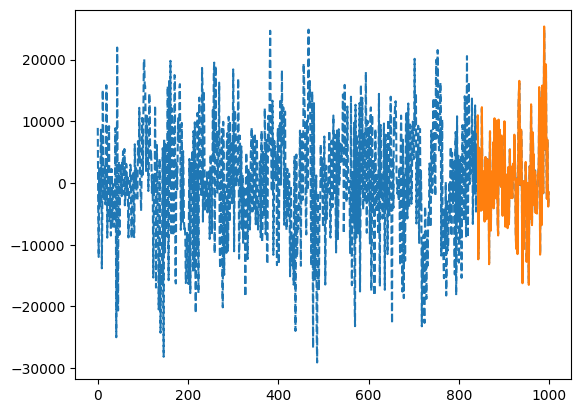

In [111]:
count = 159
ind = len(signal_part) - count
vals = triple_exponential_smoothing(signal_part, 12, 0.716, 0.029, 0.993, count)

x = range(ind + count)
x_pr = range(ind, ind + count)

plt.plot(x[:], signal_part[:], linestyle='dashed')
plt.plot(x_pr, vals[ind:ind + count])
plt.show()

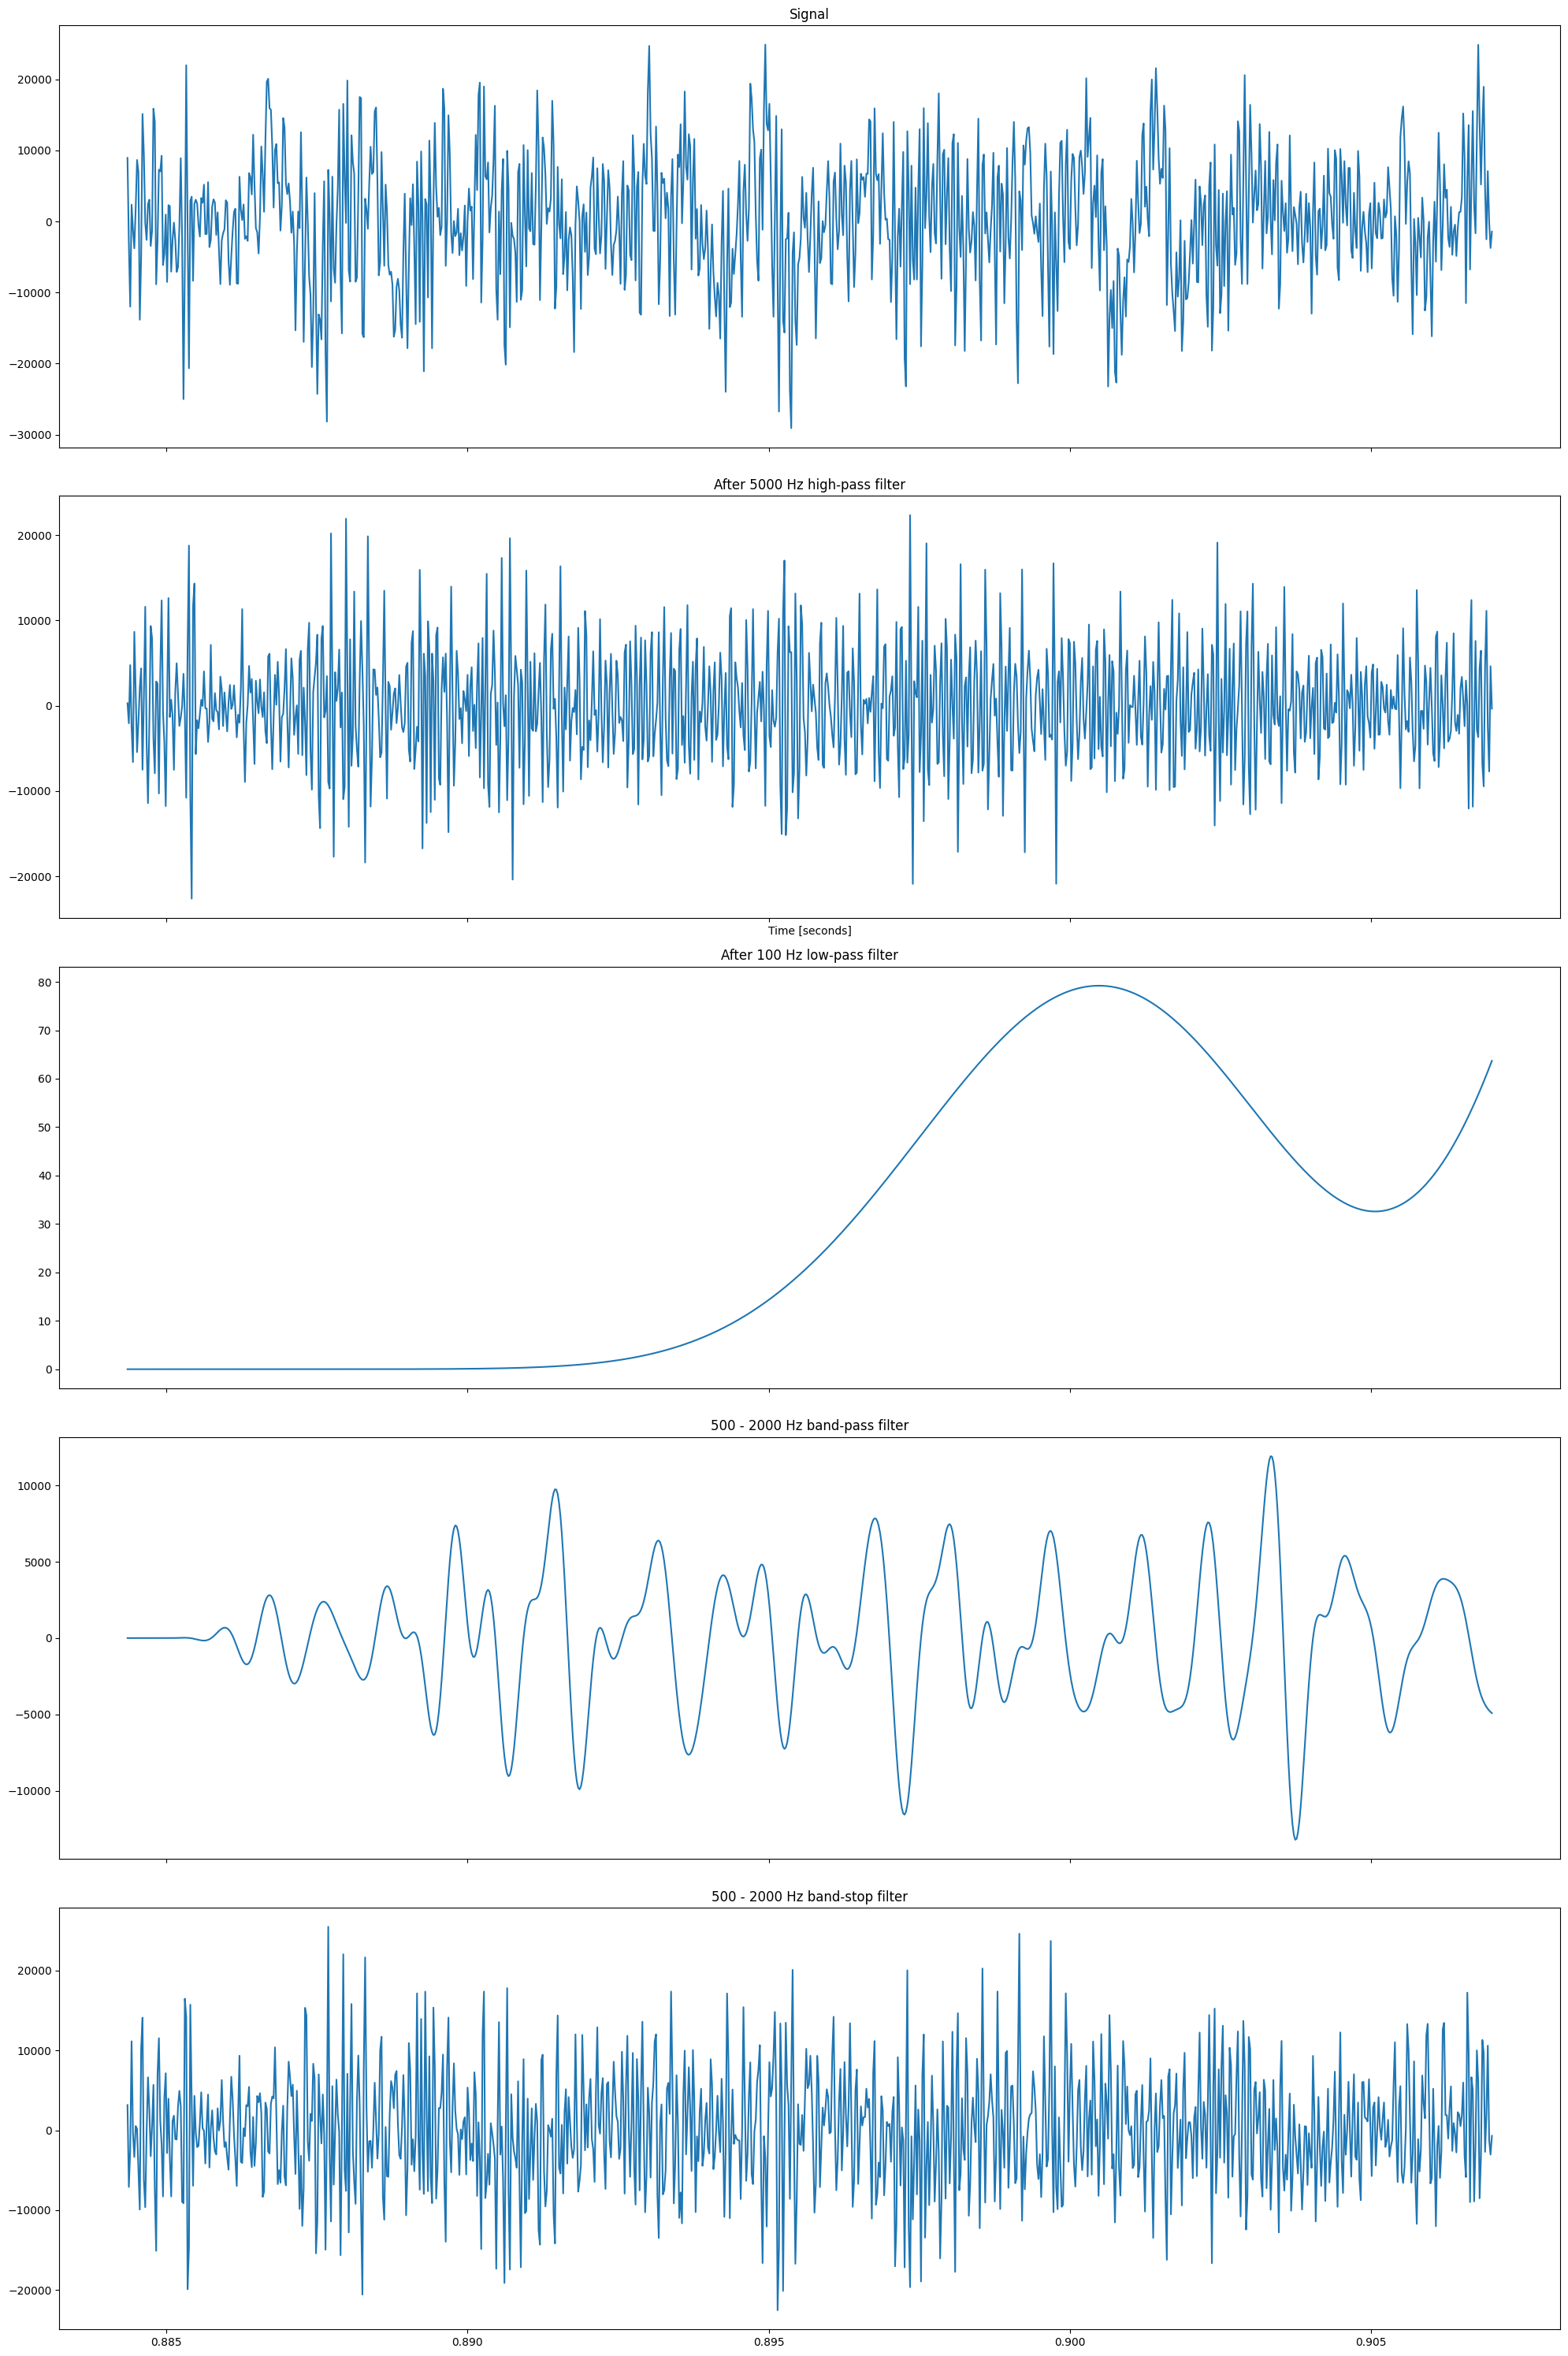

In [112]:
sos_hp = signal.cheby1(10, 1, 5000, 'hp', fs=samplerate, output='sos')
filtered_hp = signal.sosfilt(sos_hp, signal_part)

sos_lp = signal.cheby1(10, 1, 100, 'lp', fs=samplerate, output='sos')
filtered_lp = signal.sosfilt(sos_lp, signal_part)

sos_bp = signal.cheby1(10, 1, [500, 2000], 'bp', fs=samplerate, output='sos')
filtered_bp = signal.sosfilt(sos_bp, signal_part)

sos_bs = signal.cheby1(10, 1, [500, 2000], 'bs', fs=samplerate, output='sos')
filtered_bs = signal.sosfilt(sos_bs, signal_part)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, figsize=(20,30))
ax1.plot(time_part, signal_part)
ax1.set_title('Signal')

ax2.plot(time_part, filtered_hp)
ax2.set_title('After 5000 Hz high-pass filter')

ax3.plot(time_part, filtered_lp)
ax3.set_title('After 100 Hz low-pass filter')

ax4.plot(time_part, filtered_bp)
ax4.set_title('500 - 2000 Hz band-pass filter')
 
ax5.plot(time_part, filtered_bs)
ax5.set_title('500 - 2000 Hz band-stop filter')

ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

In [113]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

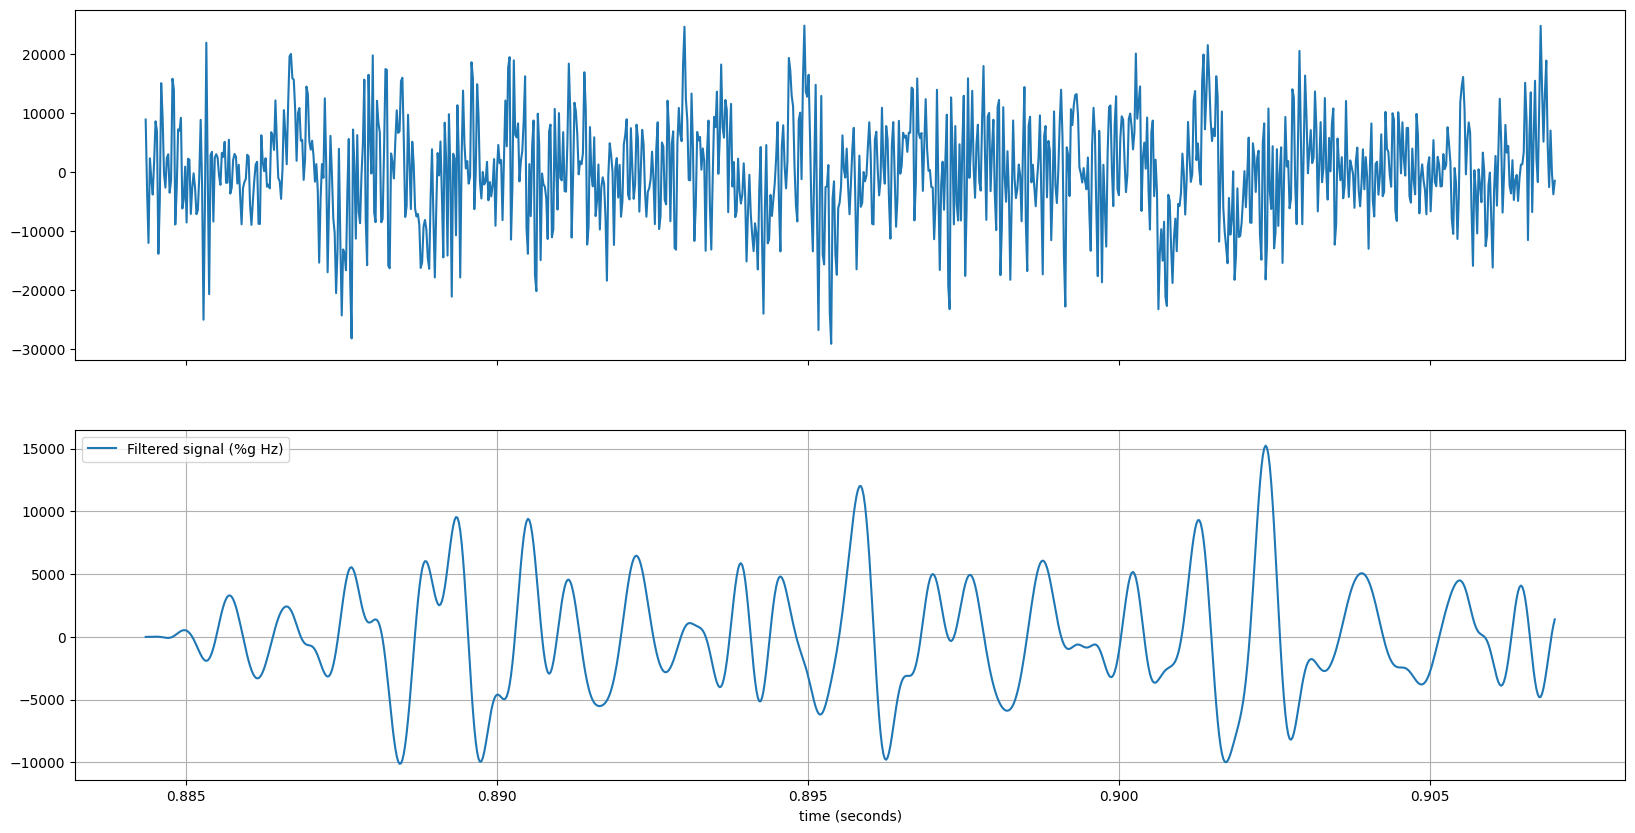

In [114]:
fs = samplerate

lowcut = 500
highcut = 2000

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

ax1.plot(time_part, signal_part, label='Noisy signal')

y = butter_bandpass_filter(signal_part, lowcut, highcut, fs, order=6)
ax2.plot(time_part, y, label='Filtered signal (%g Hz)')

plt.xlabel('time (seconds)')
 
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()